In [22]:
import requests
import os 
import numpy as np
import pandas as pd
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
%matplotlib inline

In [23]:
np.random.seed(42)

# Portfolio Planner

In this activity, you will use the iedfinance api to grab historical data for a 60/40 portfolio using `SPY` to represent the stock portion and `AGG` to represent the bonds.

In [24]:
from iexfinance.stocks import get_historical_data
import iexfinance as iex
from iexfinance.refdata import get_symbols

# Data Collection

In this step, you will need to use the IEX api to fetch closing prices for the `SPY` and `AGG` tickers. Save the results as a pandas DataFrame

In [25]:
# YOUR CODE HERE

list_of_tickers = ["SPY", "AGG"]
end_date = datetime.now()
start_date = end_date + timedelta(-365)
iex_token = os.getenv("IEX_TOKEN")
tickers=pd.DataFrame(get_symbols(output_format='pandas', token=iex_token))
tickers.head()

,symbol,exchange,name,date,type,iexId,region,currency,isEnabled
0,A,NYS,Agilent Technologies Inc.,2019-10-12,cs,IEX_46574843354B2D52,US,USD,True
1,AA,NYS,Alcoa Corp.,2019-10-12,cs,IEX_4238333734532D52,US,USD,True
2,AAAU,PSE,Perth Mint Physical Gold ETF,2019-10-12,et,IEX_474B433136332D52,US,USD,True
3,AAC,NYS,AAC Holdings Inc.,2019-10-12,cs,IEX_4843364642592D52,US,USD,True
4,AADR,PSE,AdvisorShares Dorsey Wright ADR ETF,2019-10-12,et,IEX_5253355435362D52,US,USD,True


In [26]:
Ticker1 = "SPY"
Ticker2 = "AGG"

In [27]:
df_spy = get_historical_data(Ticker1, start_date, end_date,  output_format='pandas')
df_agg = get_historical_data(Ticker2, start_date, end_date,  output_format='pandas')
df_spy1 = df_spy.drop(columns=['open','high','low','volume'])
df_spy2 = df_spy1.rename(columns={"close": "SPY"})
df_agg1 = df_agg.drop(columns=['open','high','low','volume'])
df_agg2 = df_agg1.rename(columns={"close": "AGG"})
combined_df = pd.concat([df_spy2, df_agg2], axis = "columns", join = "inner")
combined_df.head()

,SPY,AGG
date,,
2018-10-12,275.95,104.75
2018-10-15,274.40,104.68
2018-10-16,280.40,104.74
2018-10-17,280.45,104.53
2018-10-18,276.40,104.46


# Monte Carlo Simulation

In this step, you will run Monte Carlo Simulations for your portfolio to model portfolio performance at different retirement ages. 

Complete the following steps:
1. Calculate the daily returns for the SPY and AGG closing prices.
2. Calculate volatility for both the SPY and AGG closing prices.
3. Find the last day's closing price for both stocks and save those as variables.
4. Run a Monte Carlo Simulation of at least 100 iterations and generate at least 20 years of closing prices

### HINTS:
There are 252 trading days per year, so the number of records to generate for each Monte Carlo run will be 252 days * 20 years

In [28]:
# Calculate the daily roi for the stocks
# YOUR CODE HERE

daily_returns = combined_df.pct_change()
daily_returns.head()

,SPY,AGG
date,,
2018-10-12,NaN,NaN
2018-10-15,-0.005617,-0.000668
2018-10-16,0.021866,0.000573
2018-10-17,0.000178,-0.002005
2018-10-18,-0.014441,-0.000670


In [29]:
# Calculate volatility
# YOUR CODE HERE

std_dev_daily_return = daily_returns.std()
std_dev_daily_return

SPY    0.010505
AGG    0.001960
dtype: float64

In [35]:
# Save the last day's closing price
# YOUR CODE HERE

num_trading_days = 252
SPY_last_price = combined_df['SPY'][-1]
AGG_last_price = combined_df['AGG'][-1]
print(AGG_last_price)
print(SPY_last_price)

112.73
296.28


In [31]:
avg_daily_return = daily_returns.mean()

In [32]:
# Setup the Monte Carlo Parameters
number_simulations = 100
number_records = 252 * 30
monte_carlo = pd.DataFrame()
simulated_price_df = pd.DataFrame()

In [33]:
# Run the Monte Carlo Simulation

for x in range(number_simulations):
   simulated_SPY_prices = [SPY_last_price]
   simulated_AGG_prices = [AGG_last_price]
   for i in range(number_records 
):
       simulated_price_SPY = simulated_SPY_prices[-1] * (1 + np.random.normal(avg_daily_return['SPY'], std_dev_daily_return['SPY']))
       simulated_price_AGG = simulated_AGG_prices[-1] * (1 + np.random.normal(avg_daily_return['AGG'], std_dev_daily_return['AGG']))
       simulated_SPY_prices.append(simulated_price_SPY)
       simulated_AGG_prices.append(simulated_price_AGG)
   simulated_price_df["SPY prices"] = pd.Series(simulated_SPY_prices)
   simulated_price_df["AGG prices"] = pd.Series(simulated_AGG_prices)
   combined_simulated_prices = pd.concat([simulated_price_df["SPY prices"], simulated_price_df["AGG prices"]], axis = "columns", join = "inner")
   #Calculate the daily returns of simulated prices
   simulated_daily_returns = combined_simulated_prices.pct_change()
   # Set the portfolio weights (60% SPY; 40% AGG)
   weights = [0.60, 0.40]
# Use the dot function with the weights to multiply weights with each column's simulated daily returns
   portfolio_daily_returns = simulated_daily_returns.dot(weights)
    # Calculate the normalized, cumulative return series
   monte_carlo[x] = (1 + portfolio_daily_returns.fillna(0)).cumprod()
monte_carlo.head()

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.003344,0.993944,0.990805,0.998791,1.006229,1.009245,1.012372,0.993752,1.002005,0.998875,...,1.000789,1.001931,0.993476,1.001829,0.990547,0.996558,1.010844,1.011548,1.009192,1.012475
2,1.008961,0.998467,0.989163,0.997765,1.010416,0.996770,1.004825,0.979735,1.000633,1.009962,...,0.995769,1.006193,0.984616,0.995859,0.989168,0.990868,1.002396,1.012794,1.007246,1.017061
3,1.007612,0.998231,0.993510,0.989588,1.009340,1.001033,1.009382,0.971881,1.000011,1.019989,...,1.002723,1.002670,0.975654,1.001970,0.985153,0.991792,0.995697,1.013671,1.008829,1.026407
4,1.018572,1.001602,0.988079,0.996681,1.010585,0.993777,1.007027,0.968321,1.010096,1.005692,...,1.009089,1.000186,0.974354,1.006837,0.976522,0.994513,0.984599,1.015022,1.013111,1.020481


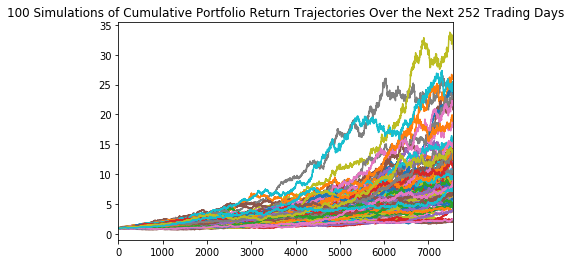

In [34]:
# Visualize the Simulation
# YOUR CODE HERE

plot_simulations = f"{x+1} Simulations of Cumulative Portfolio Return Trajectories Over the Next 252 Trading Days"
monte_carlo.plot(legend=None, title=plot_simulations)

In [37]:
# Select the last row for the cumulative returns (cumulative returns at 30 years)
# YOUR CODE HERE

ending_returns_30 = monte_carlo.iloc[-1, :]
ending_returns_30.tail()

95     6.912607
96     8.665014
97    13.920266
98    13.650035
99     7.657413
Name: 7560, dtype: float64

In [38]:
ending_returns_30.head()

0    11.868786
1     9.226155
2    14.095462
3    15.364661
4    13.267579
Name: 7560, dtype: float64

In [39]:
# Select the last row for the cumulative returns (cumulative returns at 20 years)
# YOUR CODE HERE

ending_returns_20 = monte_carlo.iloc[-10, :]
ending_returns_20.head()

0    11.723057
1     9.269645
2    13.429311
3    15.177961
4    13.710393
Name: 7551, dtype: float64

In [40]:
ending_returns_20.tail()

95     6.811015
96     8.696767
97    13.679299
98    13.663593
99     7.590118
Name: 7551, dtype: float64

In [41]:
ending_returns_20 = monte_carlo.iloc[7551]
ending_returns_20.head()

0    11.723057
1     9.269645
2    13.429311
3    15.177961
4    13.710393
Name: 7551, dtype: float64

In [42]:
# Display the 90% confidence interval for the ending returns
# YOUR CODE HERE

confidence_interval = ending_returns_30.quantile(q=[0.05, 0.95])
confidence_interval

0.05     3.687840
0.95    22.084466
Name: 7560, dtype: float64

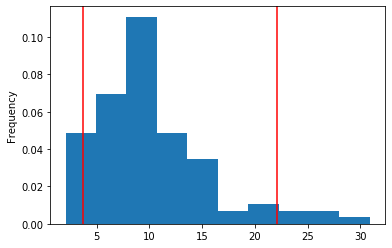

In [43]:
# Visualize the distribution of the ending returns
# YOUR CODE HERE

plt.figure();
ending_returns_30.plot(kind='hist', density=True, bins=10)
plt.axvline(confidence_interval.iloc[0], color='r')
plt.axvline(confidence_interval.iloc[1], color='r')

---

# Retirement Analysis

In this section, you will use the monte carlo model to answer the following retirement planning questions:

1. What are the expected cumulative returns at 30 years for the 10th, 50th, and 90th percentiles?
2. Given an initial investment of `$20,000`, what is the expected portfolio return in dollars at the 10th, 50th, and 90th percentiles?
3. Given the current projected annual income from the Plaid analysis, will a 4% withdraw rate from the retirement portfolio meet or exceed that value at the 10th percentile?
4. How would a 50% increase in the initial investment amount affect the 4% retirement withdrawal?

### What are the expected cumulative returns at 30 years for the 10th, 50th, and 90th percentiles?

In [44]:
# YOUR CODE HERE

cumul_ret_30_10th = ending_returns_30.quantile(q=0.10)
cumul_ret_20_10th=ending_returns_20.quantile(q=0.10)
print(f"Expected cumulative returns at 30 years for the 10th percentile {cumul_ret_30_10th}")

Expected cumulative returns at 30 years for the 10th percentile 4.366550700513965


In [45]:
cumul_ret_30_50th=ending_returns_30.quantile(q=0.5)
print(f"Expected cumulative returns at 30 years for the 50th percentile {cumul_ret_30_50th}")

Expected cumulative returns at 30 years for the 50th percentile 9.274584026444945


In [46]:
cumul_ret_30_90th=ending_returns_30.quantile(q=0.9)
print(f"Expected cumulative returns at 30 years for the 90th percentile {cumul_ret_30_90th}")

Expected cumulative returns at 30 years for the 90th percentile 16.132040819070202


### Given an initial investment of `$20,000`, what is the expected portfolio return in dollars at the 10th, 50th, and 90th percentiles?

In [48]:
initial_investment = 20000
expect_ret_10th = initial_investment + (initial_investment * cumul_ret_30_10th)
print(f"Expected portfolio return at the 10th, initial investment of $20,000 is =  ${expect_ret_10th}")

Expected portfolio return at the 10th, initial investment of $20,000 is =  $107331.01401027931


In [49]:
expect_ret_50th = initial_investment + (initial_investment * cumul_ret_30_50th)
print(f"Expected portfolio return at the 50th, initial investment of $20,000 is =  ${expect_ret_50th}")

Expected portfolio return at the 50th, initial investment of $20,000 is =  $205491.6805288989


In [50]:
expect_ret_90th = initial_investment + (initial_investment * cumul_ret_30_90th)
print(f"Expected portfolio return at the 90th, initial investment of $20,000 is =  ${expect_ret_90th}")

Expected portfolio return at the 90th, initial investment of $20,000 is =  $342640.81638140406


### Given the current projected annual income from the Plaid analysis, will a 4% withdraw rate from the retirement portfolio meet or exceed that value at the 10th percentile?

Note: This is effectively saying that 90% of the expected returns will be greater than the return at the 10th percentile, so this can help measure the uncertainty about having enough funds at retirement

In [51]:
# YOUR CODE HERE

expect_ret_10th_20=initial_investment + (initial_investment * cumul_ret_20_10th)
income_retirement_20 = expect_ret_10th_20*0.04
print(f"With 4% withdraw rate from the retirement portfolio, projected retirement annual income  ${income_retirement_20}, which is bigger than projected year income of $6085  ")

With 4% withdraw rate from the retirement portfolio, projected retirement annual income  $4268.865397222757, which is bigger than projected year income of $6085  


### How would a 50% increase in the initial investment amount affect the 4% retirement withdrawal?

In [52]:
# YOUR CODE HERE

expect_ret_10th_20_50perc=initial_investment*1.5 + (initial_investment*1.5 * cumul_ret_20_10th)
income_retirement_20_50perc = expect_ret_10th_20_50perc*0.04
print(f"A 50% increase in the initial investment would generate a projected retirement annual income of ${income_retirement_20_50perc}. Which is bigger than the projected ${income_retirement_20}")


A 50% increase in the initial investment would generate a projected retirement annual income of $6403.298095834136. Which is bigger than the projected $4268.865397222757


### Optional Challenge

In this section, you will calculate and plot the cumulative returns for the median and 90% confidence intervals. This plot shows the expected cumulative returns for any given day between the first day and the last day of investment. 

In [55]:
# YOUR CODE HERE

cumul_ret_5_df = pd.Series()
cumul_ret_50_df = pd.Series()
cumul_ret_95_df = pd.Series()
cumul_ret_5_l = []
cumul_ret_50_l = []
cumul_ret_95_l = []
for num in range(0,7560):
    ecu = monte_carlo.iloc[num]
    cumul_ret_5 = ecu.quantile(q=0.05)
    cumul_ret_50 = ecu.quantile(q=0.5)
    cumul_ret_95 = ecu.quantile(q=0.95)
    cumul_ret_5_l.append(cumul_ret_5)
    cumul_ret_50_l.append(cumul_ret_50)
    cumul_ret_95_l.append(cumul_ret_95)
    cumul_ret_5_df=pd.DataFrame(cumul_ret_5_l,columns=['5th'])
    cumul_ret_50_df=pd.DataFrame(cumul_ret_50_l,columns=['50th'])
    cumul_ret_95_df=pd.DataFrame(cumul_ret_95_l,columns=['95th'])

In [56]:
final_df = pd.concat([cumul_ret_5_df, cumul_ret_50_df,cumul_ret_95_df],sort=False)

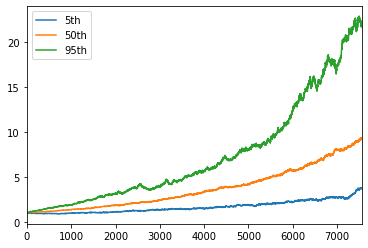

In [57]:
final_df.plot()